In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('..')
from exp_hh_model import HH_model_exp
from dataset_reader import Traces_Dataset

In [3]:
dataset = Traces_Dataset('dataset_120.csv')
time_traces = dataset.time_traces.numpy()

In [4]:
endpoints = time_traces[:, :, -1].flatten()
endpoints.shape

(8000,)

In [5]:
np.min(endpoints), np.max(endpoints)

(0.2, 59.47)

(0.0, 10.0)

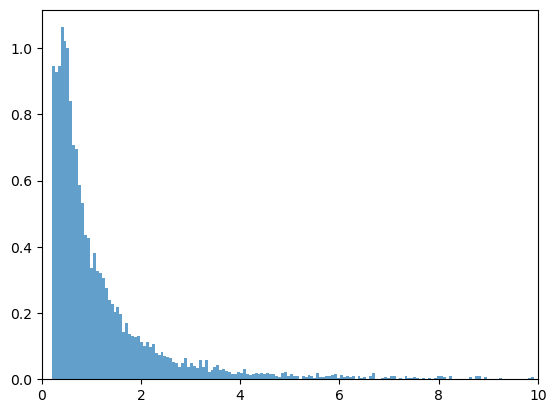

In [6]:
densities, bins, _ = plt.hist(endpoints, bins=1000, density=True, alpha=0.7)
plt.xlim(0, 10)

In [7]:
pb = densities * np.diff(bins)

In [8]:
cdf = np.cumsum(pb)

In [9]:
# Find the index of the closest element to 0.95
target_percentile = 0.95
closest_index = np.argmin(np.abs(cdf - target_percentile))

print("Index of the closest element to 0.95:", closest_index)
print("Closest percentile to 0.95:", cdf[closest_index])

Index of the closest element to 0.95: 73
Closest percentile to 0.95: 0.9495


In [10]:
len(densities), len(np.diff(bins)), len(pb), len(cdf)

(1000, 1000, 1000, 1000)

In [11]:
bins[closest_index+1]

4.58597993850708

In [19]:
index_of_6ms = np.argmin(np.abs(bins - 6))

(0.0, 10.0)

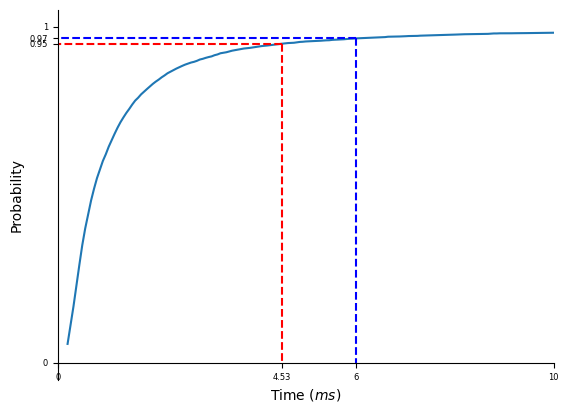

In [47]:
#CDF
plt.plot(bins[:-1], cdf)
plt.xlabel('Time ($ms$)')
plt.ylabel('Probability')

point1 = (bins[closest_index], cdf[closest_index])
point2 = (bins[index_of_6ms], cdf[index_of_6ms])

# Set spines position
plt.gca().spines['left'].set_position(('data', 0))  # y-axis at x=0
plt.gca().spines['bottom'].set_position(('data', 0))  # x-axis at y=0
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Dashed lines reaching the x and y axes
plt.plot([point1[0], point1[0]], [point1[1], 0], 'r--')
plt.plot([point1[0], 0], [point1[1], point1[1]], 'r--')

plt.plot([point2[0], point2[0]], [point2[1], 0], 'b--')
plt.plot([point2[0], 0], [point2[1], point2[1]], 'b--')

# Set ticks on x-axis corresponding to point 1 and point 2
plt.xticks([0, point1[0], point2[0], 10], ['0', f'{point1[0]:.2f}', f'{point2[0]:.0f}', '10'], fontsize=6)

# Set ticks on y-axis corresponding to point 1 and point 2
plt.yticks([0, point1[1], point2[1], 1], ['0', f'{point1[1]:.2f}', f'{point2[1]:.2f}', '1'], fontsize=6)

plt.xlim(0, 10)

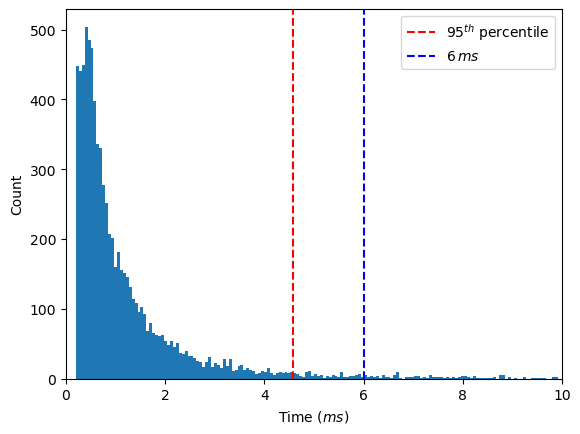

In [13]:
# current recordings saturation time Histogram
plt.hist(endpoints, bins=1000)
plt.xlim(0, 10)
plt.axvline(bins[closest_index+1], color='r', linestyle='--', label='$95^{th}$ percentile')
plt.axvline(6, color='b', linestyle='--', label = f'$6 \,ms$')
plt.xlabel('Time ($ms$)')
plt.ylabel('Count')
plt.legend()